In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a_data = pd.read_csv('C:/IDE/work/awe1.csv',  delimiter=';')
a_data.head()

,Номер заказа,Статус,Изделие,Дата формирования заявки на расчет,Расчет выполнен,Unnamed: 5,Аванс внесен,Unnamed: 7,Передан на согласование,Unnamed: 9,...,Unnamed: 15,Смонтирован/отгружен,Unnamed: 17,Специалист,Инженер,Рассчитал,Дней (расчет),Дней от договора до завершения,Сумма заказа,Примечание
0,2,9.Отказ,Козырек,09.01.2023,10.01.2023,1,. .,,. .,,...,,19.01.2023,,Подкорытова Е.А.,,Симанов С.Ю.,1,,1 845 208,Дорого/нашел дешевле\nнашли дешевле
1,16,9.Отказ,Перегородка,10.01.2023,11.01.2023,1,. .,,. .,,...,,19.01.2023,,Мироненко И.В.,,Симанов С.Ю.,1,,261 544,Дорого/нашел дешевле\nнет информации
2,18,9.Отказ,Зеркало,10.01.2023,10.01.2023,0,. .,,. .,,...,,18.01.2023,,Подкорытова Е.А.,,Симанов С.Ю.,0,,21 318,Дорого/нашел дешевле\nкупил на авито
3,25,9.Отказ,Зеркало,10.01.2023,12.01.2023,2,. .,,. .,,...,,18.01.2023,,Подкорытова Е.А.,,Симанов С.Ю.,2,,18 903,Дорого/нашел дешевле\nнашла дешевле
4,30,9.Отказ,Зеркало,10.01.2023,11.01.2023,1,. .,,. .,,...,,12.01.2023,,Тоболкин Д.А.,,Безган Д.Ю.,1,,16 954,"Дорого/нашел дешевле\nДорого, Заказчик не ожид..."


In [67]:
print(a_data.shape[0])

819


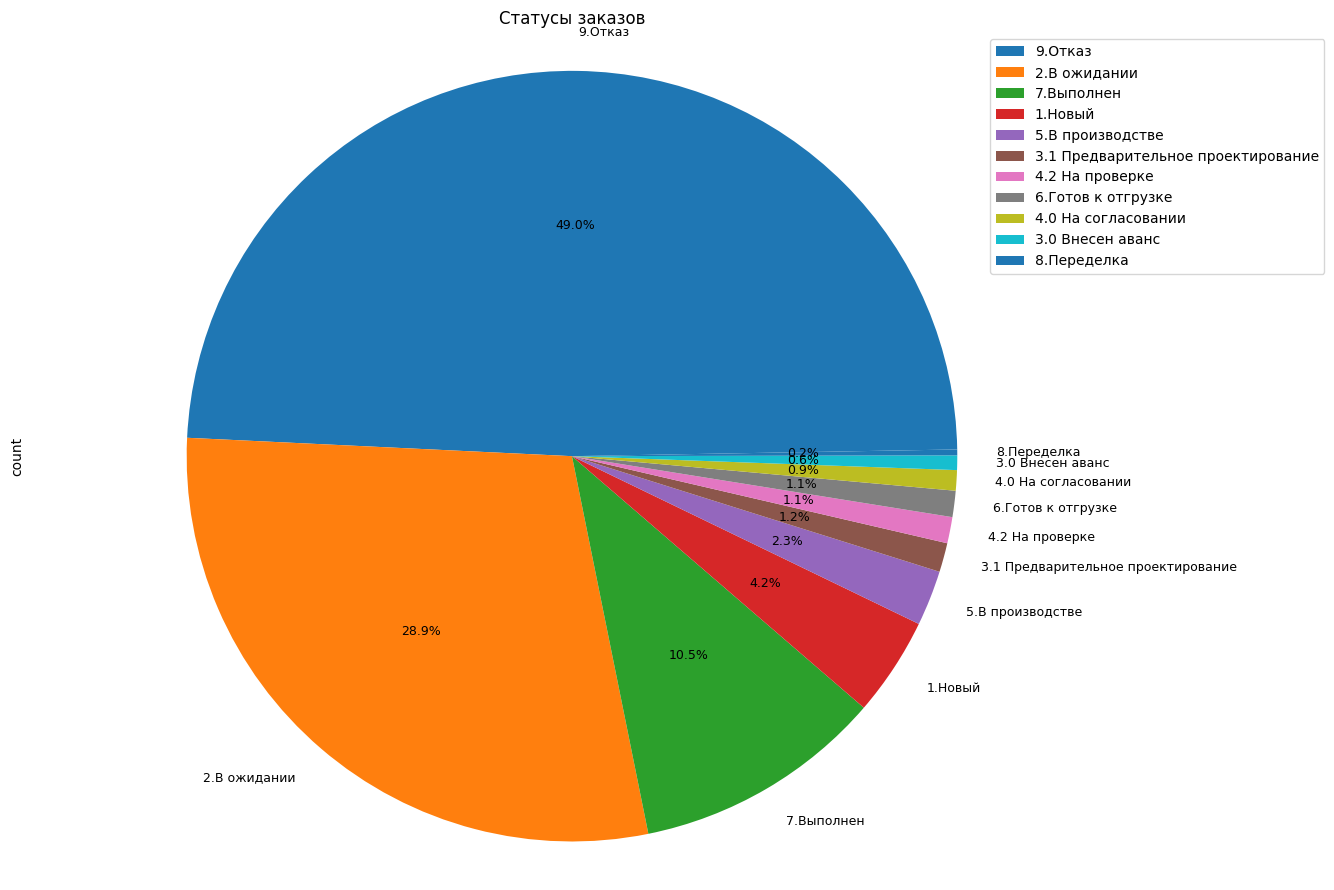

In [15]:
# Создаем круговую диаграмму для столбца "Статус"
statuses_count = a_data['Статус'].value_counts()
statuses_count.plot(kind='pie', autopct='%1.1f%%', startangle=1, 
                    shadow=False, legend=True, fontsize=9, figsize=(12, 9))

# Добавляем заголовок диаграммы
plt.title('Статусы заказов')

# Располагаем легенду в правый верхний угол, сдвинув ее относительно графика
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')

# Меняем размер области диаграммы и отображаем диаграмму
plt.tight_layout()
plt.axis('equal')
plt.show()

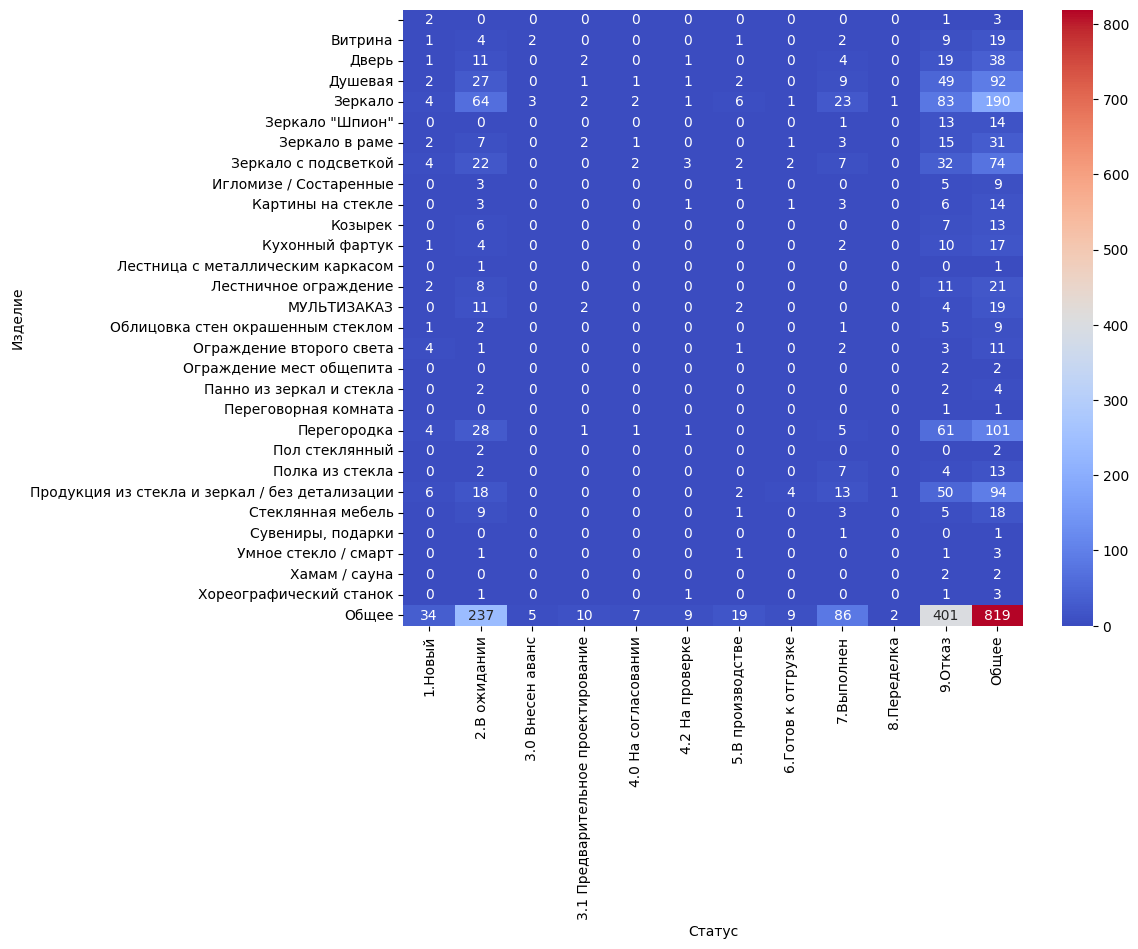

In [5]:
# создаем кросс-таблицу, чтобы показать соотношение изделий к статусу заказа
table = pd.crosstab(a_data['Изделие'], a_data['Статус'])

# находим общее количество каждого статуса
col_totals = table.sum(axis=0)

# находим общее количество каждого изделия
row_totals = table.sum(axis=1)

# добавляем в кросс-таблицу столбец с общим количеством
table['Общее'] = row_totals

# добавляем в кросс-таблицу строку с общим количеством по столбцам
table.loc['Общее'] = pd.Series(table.sum(axis=0), index=table.columns)

# строим тепловую карту
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(table, annot=True, cmap='coolwarm', fmt='d')
plt.show()

<Axes: xlabel='Статус', ylabel='Инженер'>

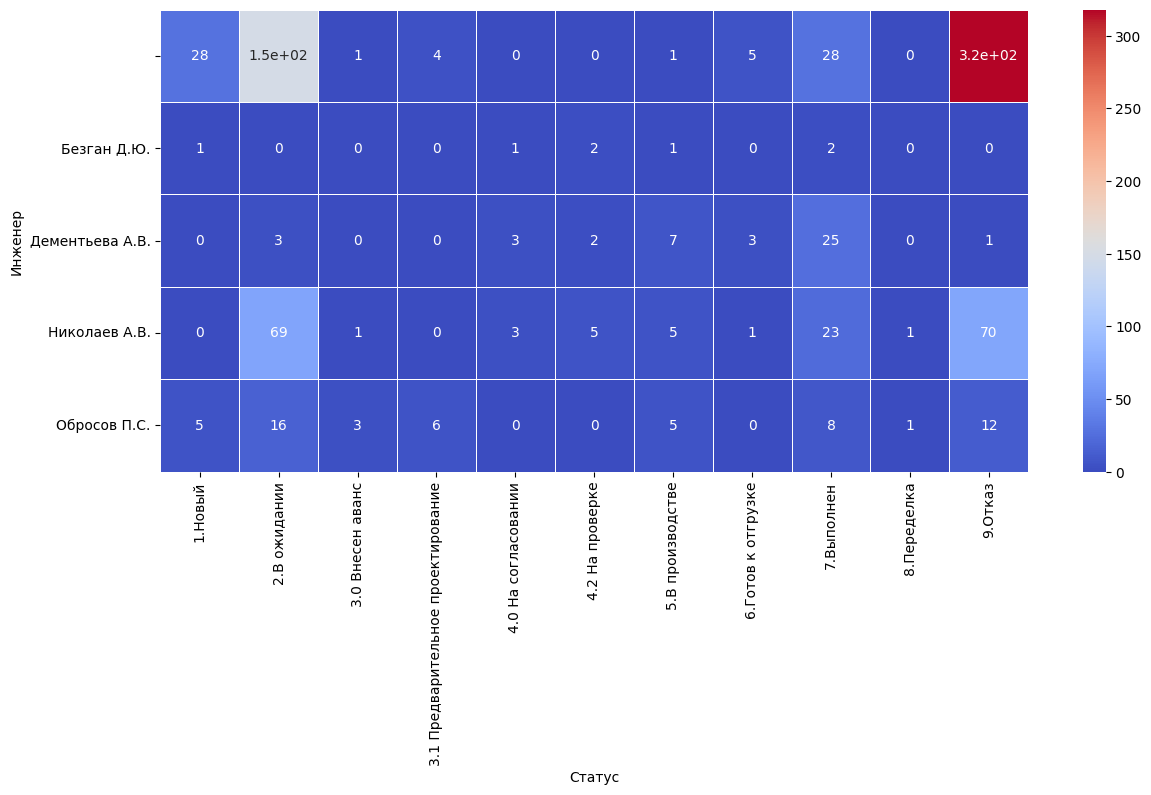

In [83]:
# создаем кросс-таблицу, чтобы показать соотношение изделий к статусу заказа
table = pd.crosstab(a_data['Инженер'], a_data['Статус'])

# строим тепловую карту
fig, ax = plt.subplots(figsize=(14, 6), dpi=100)
sns.heatmap(table, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)

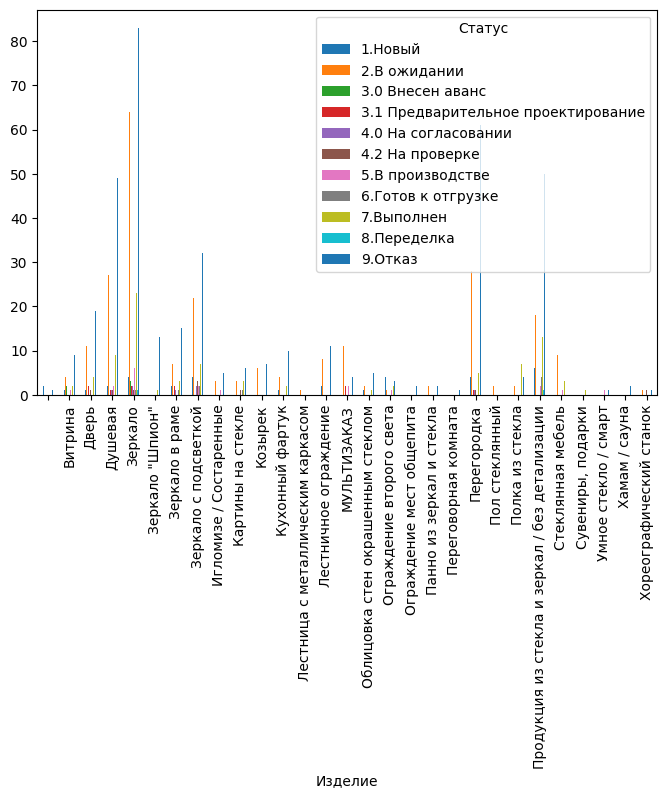

In [6]:
# создание датафрейма
df = pd.DataFrame(a_data)

# создаем кросс-таблицу, чтобы показать соотношение изделий к статусу заказа
table = pd.crosstab(a_data['Изделие'], a_data['Статус'])

# строим столбчатую диаграмму
table.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.show()

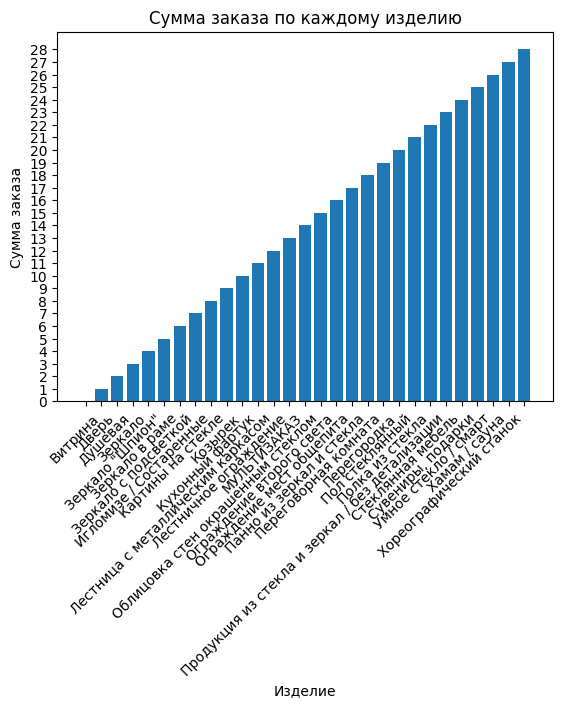

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

# подготовка данных для построения графика
grouped_data = a_data.groupby(['Изделие'])['Сумма заказа'].sum().reset_index()

# построение графика
fig, ax = plt.subplots()
ax.bar(grouped_data['Изделие'], grouped_data['Сумма заказа'])
ax.set_xlabel('Изделие')
ax.set_ylabel('Сумма заказа')

# поворот подписей оси x и разделение значений оси y
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('Сумма заказа по каждому изделию')
plt.show()

In [51]:
a_data_completed = a_data.loc[a_data['Статус'] == '7.Выполнен']




In [56]:
a_data_completed.head(2)

,Номер заказа,Статус,Изделие,Дата формирования заявки на расчет,Расчет выполнен,Unnamed: 5,Аванс внесен,Unnamed: 7,Передан на согласование,Unnamed: 9,...,Unnamed: 15,Смонтирован/отгружен,Unnamed: 17,Специалист,Инженер,Рассчитал,Дней (расчет),Дней от договора до завершения,Сумма заказа,Примечание
9,49,7.Выполнен,Перегородка,11.01.2023,17.01.2023,4,23.01.2023,4,25.01.2023,2,...,8,13.02.2023,5,Подкорытова Е.А.,Дементьева А.В.,Симанов С.Ю.,4,15,16 035,
17,75,7.Выполнен,Полка из стекла,12.01.2023,12.01.2023,0,. .,,08.02.2023,,...,6,01.03.2023,9,Обросов П.С.,,,0,,11 425,


In [58]:
a_data['Дата формирования заявки на расчет'] = pd.to_datetime(a_data['Дата формирования заявки на расчет'], format='%d.%m.%Y')
a_data['Расчет выполнен'] = pd.to_datetime(a_data['Расчет выполнен'], format='%d.%m.%Y', errors='coerce')
a_data['Аванс внесен'] = pd.to_datetime(a_data['Аванс внесен'], format='%d.%m.%Y', errors='coerce')
a_data['Передан на согласование'] = pd.to_datetime(a_data['Передан на согласование'], format='%d.%m.%Y', errors='coerce')
a_data['Смонтирован/отгружен'] = pd.to_datetime(a_data['Смонтирован/отгружен'], format='%d.%m.%Y', errors='coerce')

In [66]:
a_data_completed.head(10)

,Номер заказа,Статус,Изделие,Дата формирования заявки на расчет,Расчет выполнен,Unnamed: 5,Аванс внесен,Unnamed: 7,Передан на согласование,Unnamed: 9,...,Unnamed: 15,Смонтирован/отгружен,Unnamed: 17,Специалист,Инженер,Рассчитал,Дней (расчет),Дней от договора до завершения,Сумма заказа,Примечание
9,49,7.Выполнен,Перегородка,11.01.2023,17.01.2023,4,23.01.2023,4,25.01.2023,2,...,8,13.02.2023,5,Подкорытова Е.А.,Дементьева А.В.,Симанов С.Ю.,4,15,16 035,
17,75,7.Выполнен,Полка из стекла,12.01.2023,12.01.2023,0,. .,,08.02.2023,,...,6,01.03.2023,9,Обросов П.С.,,,0,,11 425,
18,76,7.Выполнен,Зеркало,12.01.2023,16.01.2023,2,21.02.2023,26,. .,,...,16,22.03.2023,4,Вотинцева Н.В.,,Симанов С.Ю.,2,21,10 512,
19,78,7.Выполнен,Перегородка,13.01.2023,17.01.2023,2,. .,,03.02.2023,,...,7,21.02.2023,5,Мироненко И.В.,Обросов П.С.,Обросов П.С.,2,,52 201,
35,118,7.Выполнен,Кухонный фартук,17.01.2023,17.01.2023,0,18.01.2023,1,. .,,...,11,17.02.2023,1,Киселёва Л.Н.,,,0,22,8 350,
40,130,7.Выполнен,Зеркало,18.01.2023,18.01.2023,0,18.01.2023,0,19.01.2023,,...,13,07.02.2023,0,Подкорытова Е.А.,,,0,14,7 523,
49,149,7.Выполнен,Зеркало,20.01.2023,20.01.2023,0,24.01.2023,2,06.02.2023,10,...,9,27.02.2023,5,Киселёва Л.Н.,Николаев А.В.,Николаев А.В.,0,24,84 074,
52,158,7.Выполнен,Картины на стекле,23.01.2023,23.01.2023,0,26.01.2023,3,06.02.2023,7,...,17,10.03.2023,7,Киселёва Л.Н.,Дементьева А.В.,Безган Д.Ю.,0,31,107 950,
55,171,7.Выполнен,Облицовка стен окрашенным стеклом,23.01.2023,25.01.2023,2,. .,,16.02.2023,,...,10,09.03.2023,3,Мироненко И.В.,Обросов П.С.,Обросов П.С.,2,,1 097 822,
56,184,7.Выполнен,Зеркало,23.01.2023,23.01.2023,0,. .,,27.01.2023,,...,11,17.02.2023,3,Подкорытова Е.А.,Дементьева А.В.,Симанов С.Ю.,0,,12 830,


In [93]:
a_data['Сумма заказа'] = pd.to_numeric(a_data['Сумма заказа'], errors='coerce')
a_data['Запущен в производство'] = pd.to_datetime(a_data['Запущен в производство'], errors='coerce')
a_data['Проверен'] = pd.to_datetime(a_data['Проверен'], errors='coerce')
a_data['Дней (расчет)'] = pd.to_datetime(a_data['Дней (расчет)'], errors='coerce')
a_data['Дней от договора до завершения'] = pd.to_datetime(a_data['Дней от договора до завершения'], errors='coerce')
a_data['Продолжительность выполнения заказа'] = pd.to_datetime(a_data['Продолжительность выполнения заказа'], errors='coerce') 

In [95]:
a_data = a_data.drop(['Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17'], axis=1)

In [96]:
print(a_data.dtypes)

Номер заказа                                    int64
Статус                                         object
Изделие                                        object
Дата формирования заявки на расчет     datetime64[ns]
Расчет выполнен                        datetime64[ns]
Аванс внесен                           datetime64[ns]
Передан на согласование                datetime64[ns]
Проверен                               datetime64[ns]
Запущен в производство                 datetime64[ns]
Готов к отгрузке                               object
Смонтирован/отгружен                   datetime64[ns]
Специалист                                     object
Инженер                                        object
Рассчитал                                      object
Дней (расчет)                          datetime64[ns]
Дней от договора до завершения         datetime64[ns]
Сумма заказа                                  float64
Примечание                                     object
Продолжительность выполнения

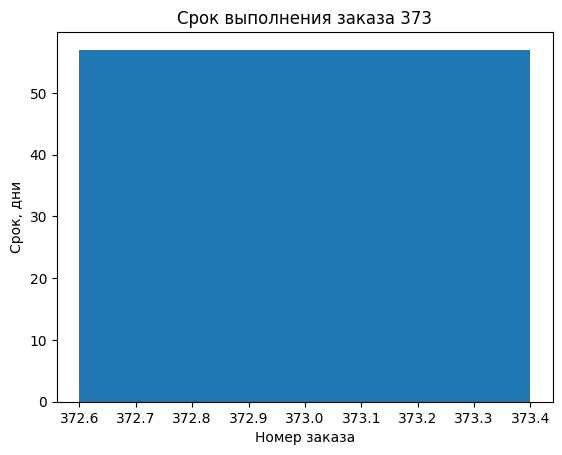

In [112]:
import matplotlib.pyplot as plt

# фильтруем данные только по заказу 147
grouped_data = a_data[a_data['Номер заказа'] == 373].groupby('Номер заказа')

# проходимся по группе и строим диаграмму
for name, group in grouped_data:
    # считаем срок выполнения заказа в днях
    duration = (group['Смонтирован/отгружен'] - group['Дата формирования заявки на расчет']).mean().days
    
    # строим диаграмму
    plt.bar(name, duration)
    plt.xlabel('Номер заказа')
    plt.ylabel('Срок, дни')
    plt.title(f'Срок выполнения заказа {name}')
    plt.show()


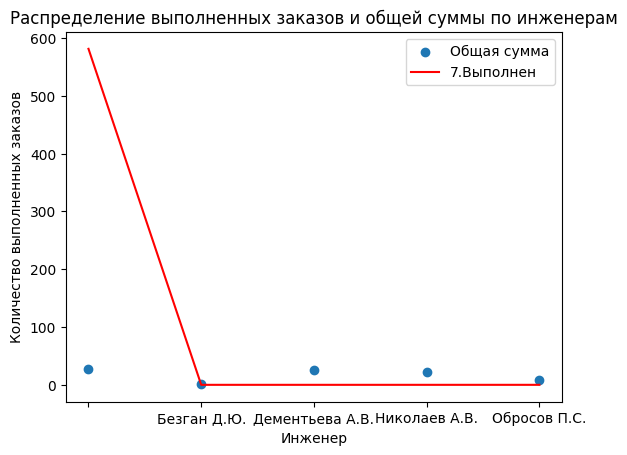

In [131]:

engineer_status = a_data[['Инженер', 'Статус']]
engineer_counts = engineer_status.groupby(['Инженер', 'Статус']).size().unstack(fill_value=0)

plt.scatter(engineer_counts.index, engineer_counts['7.Выполнен'])
plt.plot(engineer_total.index, engineer_total['Сумма заказа'], color='red')
plt.xlabel('Инженер')
plt.ylabel('Количество выполненных заказов')
plt.title('Распределение выполненных заказов и общей суммы по инженерам')
plt.legend(['Общая сумма', '7.Выполнен'])
plt.show()
